**Rio de Janeiro, 20 de Junho de 2016**

Grupo: **Carlos Mattoso** _[ **1210553** ]_ e **Leandro Morgado** _[ **1212042** ]_

Disciplina: **INF1608 - Análise Numérica**

# Trabalho Final - Interpolação Multivariada

## Vizinhos mais Próximos

### Descrição

#### Introdução

O algoritmo de vizinhos mais próximos, em inglês chamado de _Nearest Neighbors_, é um algoritmo não paramétrico e baseado em instância [1]. Ele é não paramétrico em que não faz suposições quanto aos dados sobre os quais executa, o que é vantajoso no domínio de mineração de dados visto que é comum os dados no mundo real não respeitarem as suposições teóricas impostas por certos modelos (como serem linearmente separáveis, etc). É baseado em instância por não produzir um modelo generalizado dos dados: não há uma fase de treinamento, o conjunto completo da base de dados de entrada é usado para se inferir o desejado sobre as instâncias de teste.

#### Definições Básicas

Sejam os dados de entrada $n$ vetores $x^{(t)}, t \leq n$ com $d$ atributos (i.e. $x \in \mathbb{R}^{d}$). A cada um destes vetores é associada uma variável escalar de saída $y^{(t)}$, que pode ser numérica ou categórica, existindo neste caso $C$ classes. Ou seja, este algoritmo pode ser empregado para problemas de regressão ou de classificação. O algoritmo espera uma entrada $k$ que define o número de vizinhos mais próximos a serem avaliados. É também necessária a definição de uma função $D(x_1, x_2)$ que retorne a distância entre dois vetores $x$; comumente utiliza-se a métrica de distância Euclidiana, mas o usuário pode definir sua própria.

#### Algoritmo

O princípio básico do algoritmo é, dado um vetor de entrada $u$, eleger a saída $y_u$ com base nas saídas dos $k$ vetores $x$ mais próximos de $u$. No problema de classificação, a saída é comumente a moda das saídas dos $k$ vetores mais próximos; a fim de minimizar casos de empate das possíveis classes de saída, adota-se $k > C$ e ímpar, mas, havendo empate, arbitra-se uma classe. No de regressão, é comumente a média simples. Pode-se alternativamente fazer uma eleição ponderada da saída, utilizando-se o inverso da distância como pesos de ponderação, como feito no método de _Sheppard_; isto pode melhorar os resultados obtidos.

Para implementar-se o algoritmo deve-se fazer o seguinte:
1. Define-se um valor de $k$ e uma nova amostra $u$
2. Selecionam-se as $k$ instâncias do banco de dados mais próximas a $u$ com base na função $D$.
3. 
    - _Classificação_: Encontra-se a classificação mais comum
    - _Regressão_: Calcula-se a média dos $k$ valores
4. O valor determinado em $3$ é a saída $y$ da instância $u$

A seleção de $k$ instâncias é um processo computacionalmente caro que tem, se feito por força bruta comparando-se as $n$ instâncias 2 a 2, complexidade de $\mathcal{O}{\left(n^2d\right)}$. Uma forma mais eficiente é se utilizar uma estrutura de dados, como uma _árvore KD_ [2]. A ideia básica desta estrutura, baseado no princípio da desigualdade de triângulos, é que se um ponto $A$ é distante de um ponto $B$, e $B$ é próximo de um ponto $C$, então sabe-se que $A$ e $C$ também são distantes. Utilizando-se esta estrutura pode-se obter uma complexidade de $\mathcal{O}{\left(DN\log{N}\right)}$.

### Demonstração

Confira neste _link_ uma demonstração interativa do problema de _KNN_: [Interactive K-Nearest Neighbors](http://www.lettier.com/projects/knearestneighbors/)

### Considerações

A seleção do valor de $k$ deve ser feita de forma cuidadosa. Um pequeno valor de $k$ irá resultar em influência excessiva de ruído que exista no banco de dados. Por outro lado, um $k$ muito grande acabará escolhendo simplesmente a moda/média do banco de dados de "treinamento", tornando a fronteira das regiões menos distinta [4]. Sendo assim, uma boa maneira de se chegar a um bom $k$ é testar diferentes valores e determinar qual produz melhores resultados; para isto, segmente o banco de dados original em uma base de "treinamento" e uma de "testes" e, para diferentes valores de "k", calcule o erro de classificação/regressão das instâncias de teste.

Devido a necessidade de se computar uma métrica de distância entre as instâncias, é necessário definir um cálculo para o caso de atributos categóricos. Dependendo da semântica do atributo, podem-se definir valores numéricos que representem a distância entre diferentes graus categóricos (e.g. solteiro - 0, viúvo - 1, casado - 2, etc). Uma métrica que pode ser considerada para representações binárias dos dados, caso admissível, é a [distância de Hamming](https://en.wikipedia.org/wiki/Hamming_distance).

Caso haja um número elevado de dimensões, o custo computacional do algoritmo, mesmo com estruturas que o tornem mais eficiente, pode ser demasiado elevado. Nestes casos, pode ser vantajoso usar uma técnica de redução de dimensionalidade, como a análise de componentes principais vista em sala.

Por fim, é importante considerar a ordem de magnitude dos atributos. Atributos que sejam de uma escala muito elevada relativa aos demais podem dominar a métrica de distância escolhida, mesmo que eles não constituam de fato as componentes principais da base. Sendo assim, é recomendável normalizar os atributos, caso sejam de escalas muito distintas.

### Exemplos

#### Classificação [5]

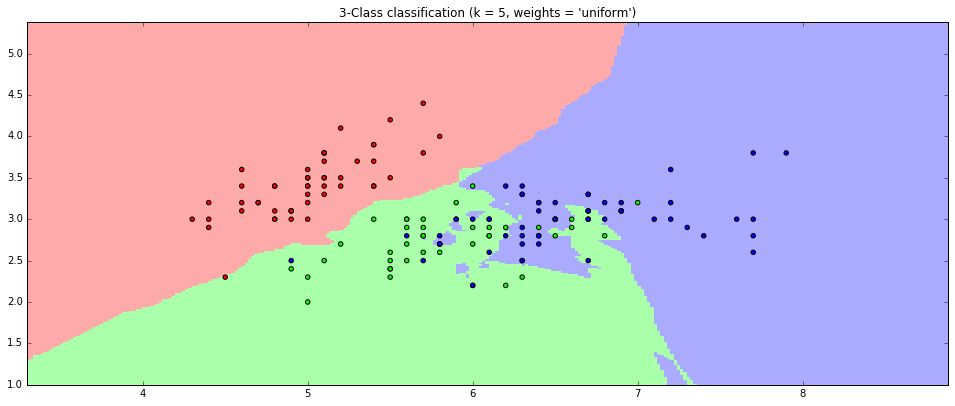

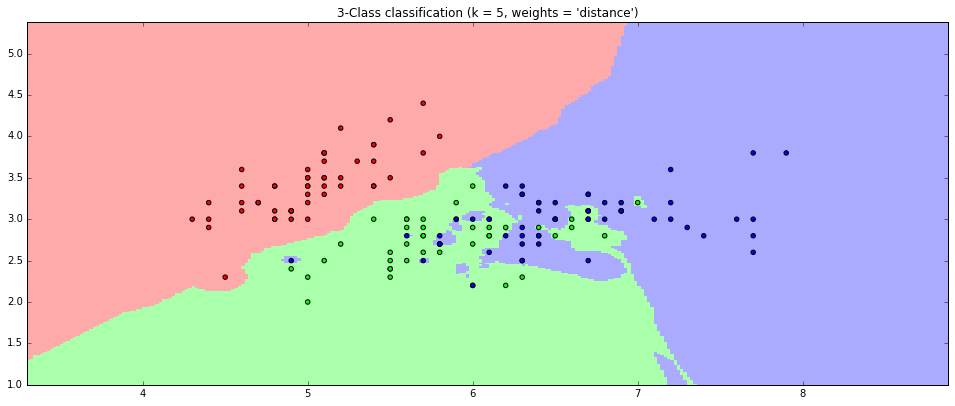

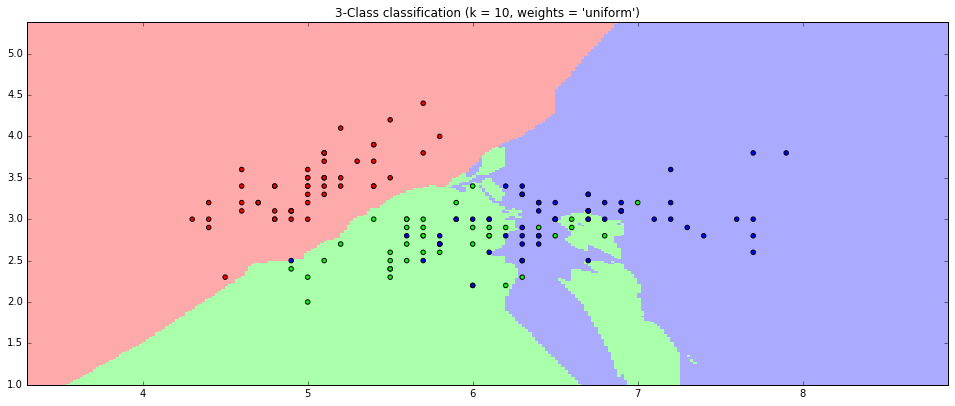

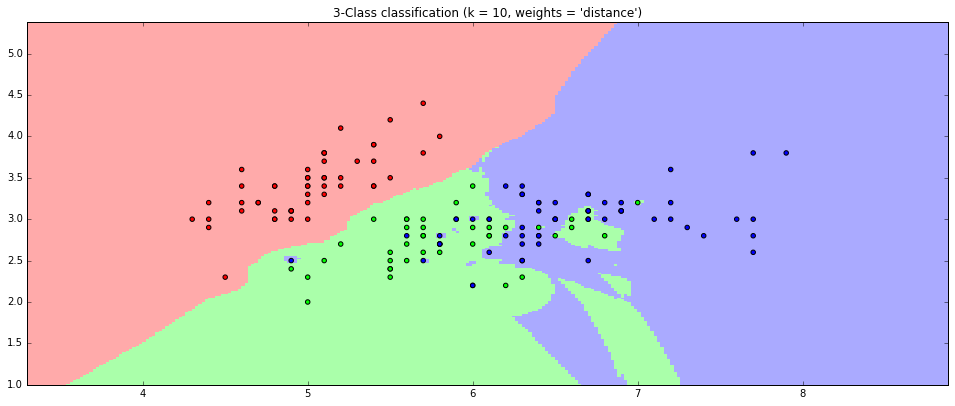

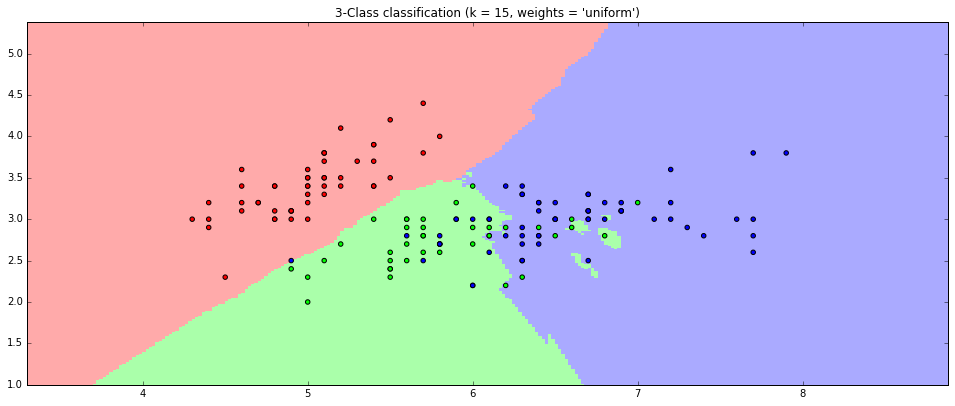

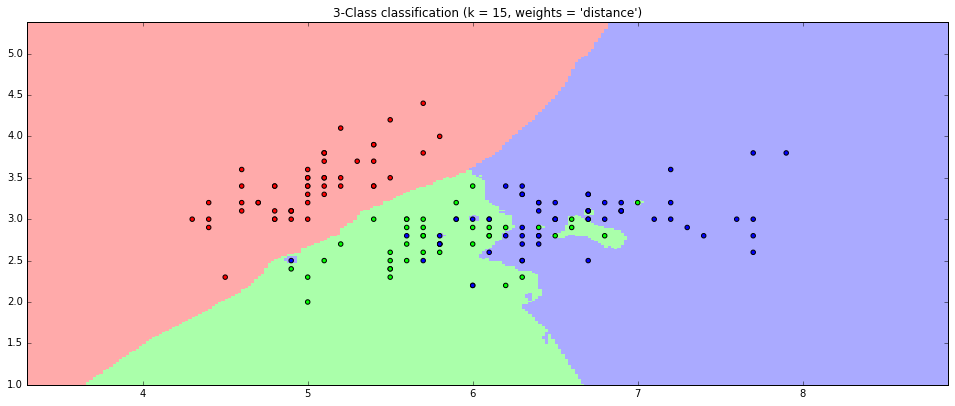

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

%matplotlib inline

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n_neighbors in range(5,16,5):
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        fig = plt.gcf()
        fig.set_size_inches(16.5, 6.5)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))
plt.show()

#### Regressão [6]

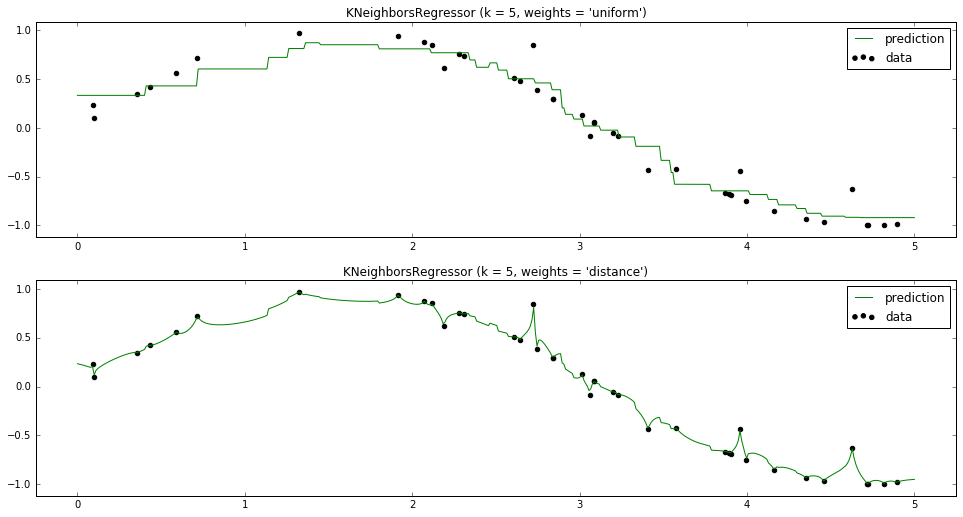

In [25]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA

###############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))
fig = plt.gcf()
fig.set_size_inches(16.5, 8.5)
plt.show()

### Aplicação

Esta aplicação, uma modificação de [8], utiliza o algoritmo de vizinhos mais próximos para classificar dígitos numéricos manuscritos. Estes dígitos são extraídos da base de dados _MNIST_ [9], frequentemente empregada para experimentação de métodos de aprendizado e de reconhecimento de padrões.

Relatório da classificação com KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.99      1.00      0.99        88
          1       0.95      0.98      0.96        91
          2       0.98      0.93      0.95        86
          3       0.89      0.90      0.90        91
          4       1.00      0.95      0.97        92
          5       0.96      0.98      0.97        91
          6       0.99      1.00      0.99        91
          7       0.95      1.00      0.97        89
          8       0.95      0.90      0.92        88
          9       0.91      0.92      0.92        92

avg / total       0.96      0.96      0.96       899


Matriz de Confusão:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  0  

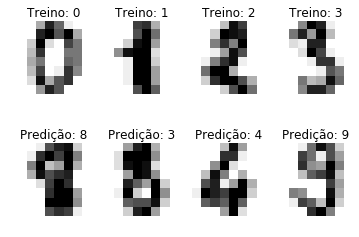

In [26]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
%matplotlib inline

# Import datasets, classifiers and performance metrics
from sklearn import datasets, neighbors, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Treino: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a KNN classifier (k = 5)
classifier = neighbors.KNeighborsClassifier(n_neighbors = 5)

# We learn the digits on the first half of the digits
classifier.fit(data[:int(n_samples / 2)], digits.target[:int(n_samples / 2)])

# Now predict the value of the digit on the second half:
expected = digits.target[int(n_samples / 2):]
predicted = classifier.predict(data[int(n_samples / 2):])

print("Relatório da classificação com %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Matriz de Confusão:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[int(n_samples / 2):], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Predição: %i' % prediction)

plt.show()

## Baricêntrica

Referências: 
1. Função: http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html#scipy.interpolate.barycentric_interpolate
2. Classe: http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BarycentricInterpolator.html#scipy.interpolate.BarycentricInterpolator
3. Aula: https://classes.soe.ucsc.edu/cmps160/Fall10/resources/barycentricInterpolation.pdf
4. Alguns artigos:
    1. https://1drv.ms/b/s!ArfS7ng2a8OZgoZ7doHW13-7voLplA
    2. http://epubs.siam.org/doi/pdf/10.1137/S0036144502417715

### Descrição

### Aplicação

## Função de Base Radial

### Descrição

#### Introdução

O método de interpolação por Função de Base Radial, em inglês chamado de _Radial Basis Function (RBF) Interpolation_, é um método empregado na interpolação de dados multidimensionais esparsos e dispersos, que consiste no cálculo de uma combinação linear das avaliações sobre todos os pontos da base de dados de uma única função base, radialmente simétrica em torno de seu centro [10]. 

Este método é uma generalização do método multiquadrático desenvolvido por Hardy em 1968, cujo objetivo era determinar uma função contínua que provesse uma modelagem satisfatória de uma superfície topográfica, isto é, além de passar exatamente pelos pontos da base de dados também produzisse uma boa aproximação dos atributos da superfície.

#### Definições Básicas

Sejam os dados de entrada $n$ vetores $d$-dimensionais $x^{(t)}, t \leq n$. A cada um destes vetores é associada uma variável escalar de saída $y^{(t)}, y^{(t)} \in \mathbb{R}$.

Uma função de base radial $\Phi$ é uma função real cujo valor depende exclusivamente da distância do argumento a origem, de modo que $\Phi{\left(x\right)} = \Phi{\left(\|x\|\right)}$; alternativamente, seu valor baseia-se na distância de um determinado ponto de centro $c$, de modo que  $\Phi{\left(x\right)} = \Phi{\left(\|x - c\|\right)}$, sendo esta a forma adotada no método de interpolação RBF [11].

#### Algoritmo

O princípio básico do algoritmo é definir um campo $\Phi^{(t)}$, produzido por uma função de base radial, em torno de cada vetor $x^{(t)}$ da base de dados de entrada. Para se determinar a saída desconhecida $y_u$ associada a um vetor $u$, calcula-se uma combinação linear das avaliações de $u$ para cada $\Phi^{(t)}, t \leq n$. 

![2D Representation of Algorithm](http://i.imgur.com/ZKYhJ6A.png)

Isto é, o algoritmo é definido pela seguinte fórmula:
$$
y_u = \sum\limits_{i=1}^n {\omega^{(i)}\Phi{\left(\left\|{u - x^{(i)}}\right\|\right)}}
$$

Sendo $w^{(i)}$ o peso associado a cada vetor de entrada $x^{(i)}$. Estes pesos são desconhecidos e precisam ser determinados. Observe que a expressão acima deve valer para os pares $(x^{(t)}, y^{(t)})$ da própria base de entrada. Portanto, basta resolver o sistema que segue:

$$
Aw = y
$$

Em que:

- $A$ é uma matriz quadrada de dimensão $n$ na qual $A_{i,j} = \Phi{\left(\|x^{(j)} - x^{(i)}\|\right)}$
- $w$ é o vetor coluna de tamanho $n$ dos pesos desconhecidos, sendo $w_i = \omega^{(i)}$
- $y$ é o vetor coluna de tamanho $n$ das saídas $y^{(t)}$, sendo $y_i = y^{(i)}$.

Deve-se aqui abrir um parênteses: a função de base radial $\Phi$ a ser empregada no algoritmo fica a critério do usuário, logo é importante que seja adotada uma função que resulte em um método com uma única solução para o sistema dado acima. Possíveis funções de base radial que cumprem este critério são [10]: 

- multiquádrica: $\sqrt{1 + \left({\epsilon r}^2\right)}$
- gaussiana: $e^{-\left({\epsilon r}^2\right)}$
- linear: $r$ 

Além disto, o parâmetro $\epsilon$ que aparece nas fórmulas de algumas funções ajusta o formato de sua curva: no caso das gaussianas, resulta em curvas mais chatas, por exemplo.

Caso a função $\Phi$ adotada seja apropriada e os vetores de entrada $x$ sejam todos distintos, o sistema é não singular e portanto tem solução algébrica [10, 12]. Em todo caso, pode-se resolver o sistema empregando-se algum método de aproximação por mínimos quadrados caso $A$ seja singular.

### Exemplos [13]

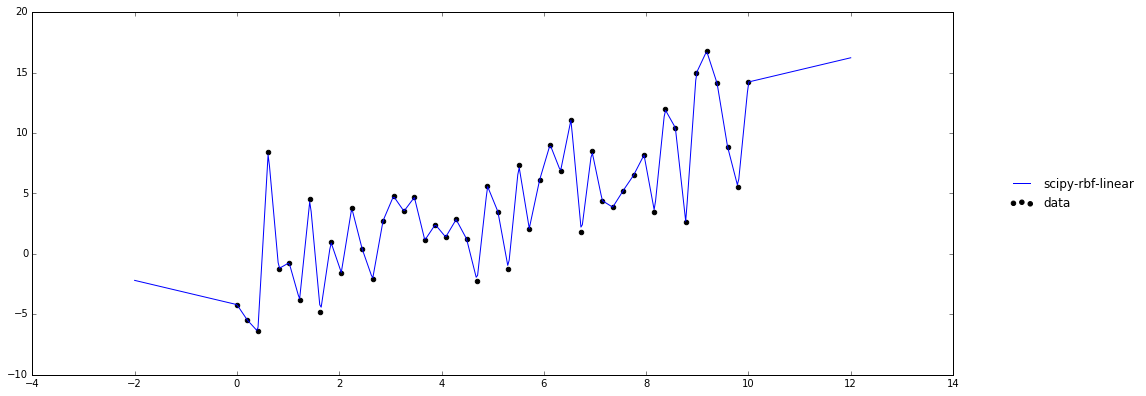

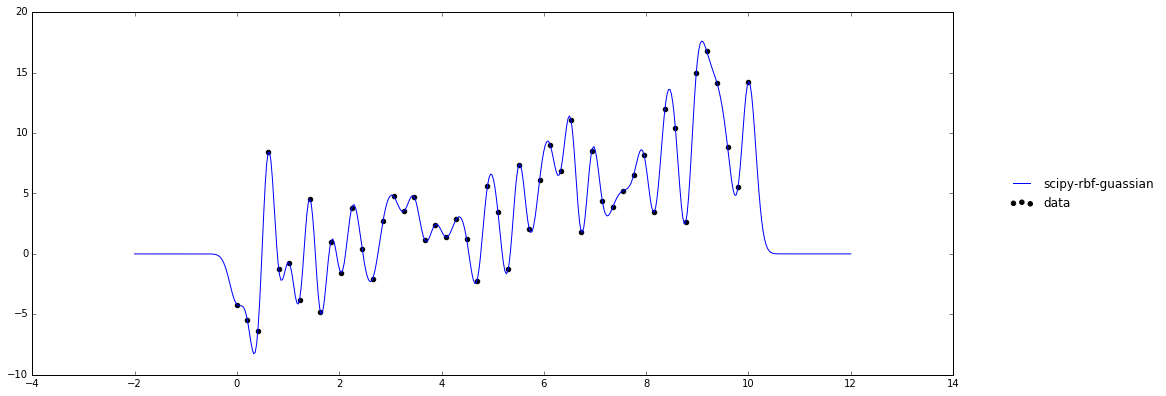

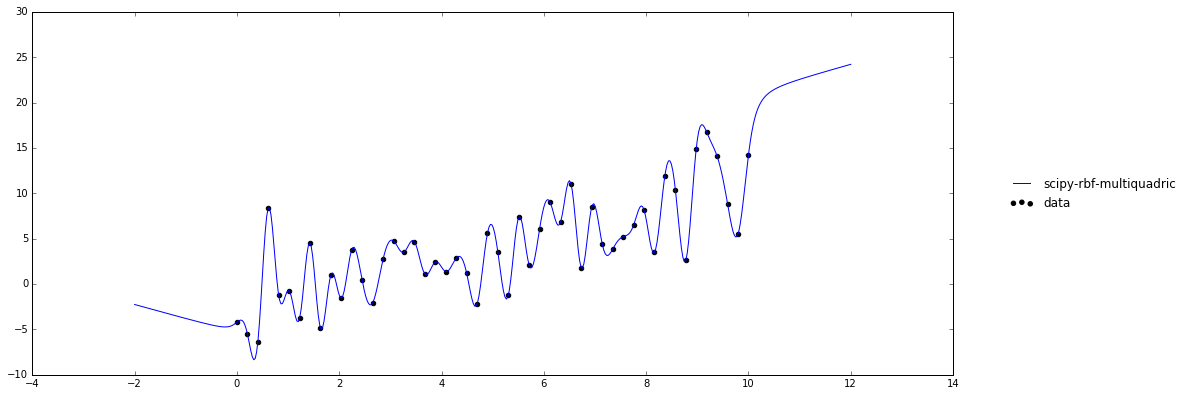

In [27]:
from numpy.random import randn
import matplotlib.pyplot as plt

%matplotlib inline

# Generate some data
x  = np.linspace(0, 10, 50)
x1 = np.linspace(-2, 12, 500)
z = x + 4.0 * randn(len(x))

# RBF - Linear
plt.scatter(x, z, color='black', label='data')
rbf = Rbf(x, z, function='linear')
plt.plot(x1, rbf(x1), label='scipy-rbf-linear')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

# RBF - Gaussian
plt.scatter(x, z, color='black', label='data')
rbf = Rbf(x, z, function='gaussian')
plt.plot(x1, rbf(x1), label='scipy-rbf-guassian')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

# RBF - Multiquadric
plt.scatter(x, z, color='black', label='data')
rbf = Rbf(x, z, function='multiquadric')
plt.plot(x1, rbf(x1), label='scipy-rbf-multiquadric')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

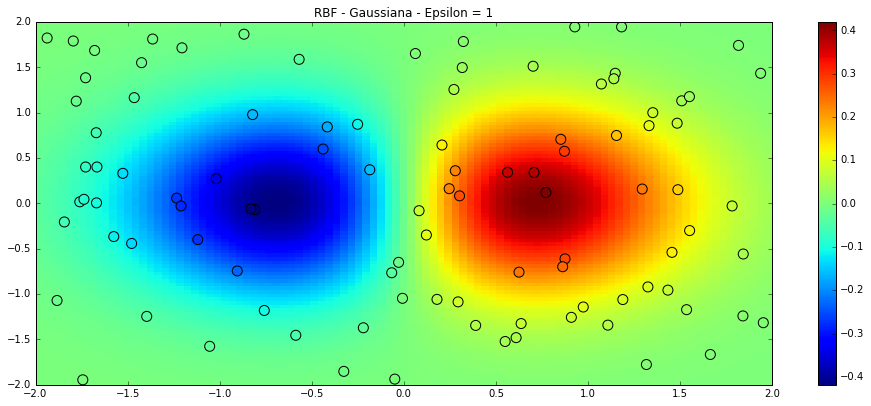

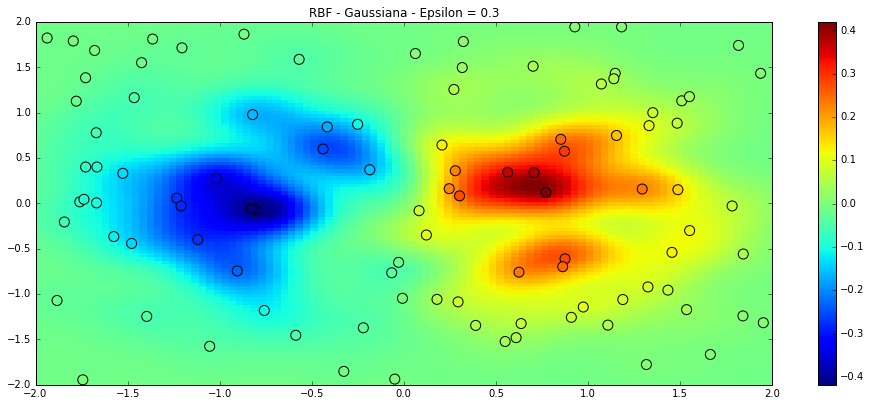

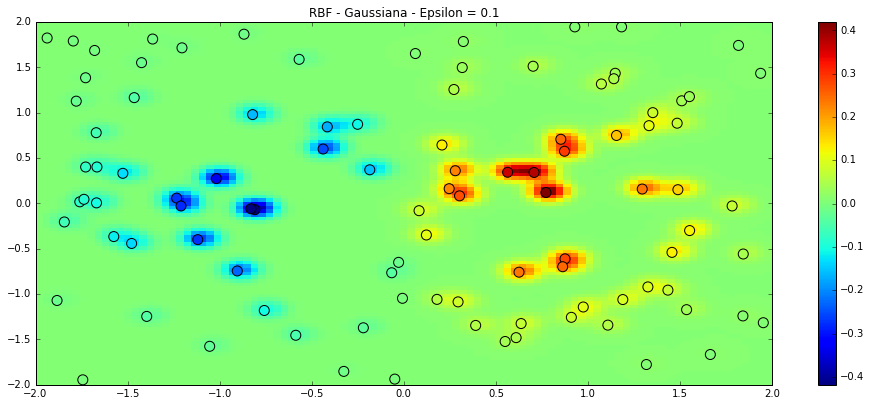

In [28]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

# 2-d tests - setup scattered data
np.random.seed(17)
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# Gaussiana - Epsilon=1
rbf = Rbf(x, y, z, epsilon=1, function='gaussian')
ZI = rbf(XI, YI)
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF - Gaussiana - Epsilon = 1')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()
plt.show()

# Gaussiana - Epsilon=0.3
rbf_flatter = Rbf(x, y, z, epsilon=0.3, function='gaussian')
ZI = rbf_flatter(XI, YI)
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF - Gaussiana - Epsilon = 0.3')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()
plt.show()

# Gaussiana - Epsilon=0.1
rbf_extreme = Rbf(x, y, z, epsilon=0.1, function='gaussian')
ZI = rbf_extreme(XI, YI)
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF - Gaussiana - Epsilon = 0.1')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()
plt.show()

### Aplicação

Abaixo utiliza-se o método _RBF_ para se reconstruir uma imagem danificada. Apesar da perda significativa de dados, a imagem interpolada consegue recuperar uma quantidade razoável da informação visual existente na imagem original, sendo possível identificar os traços e cores característicos do guaxinim e do ambiente. 

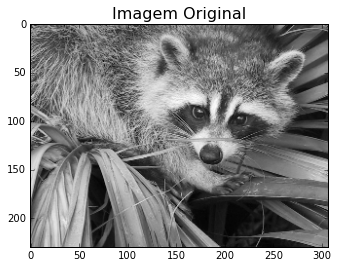

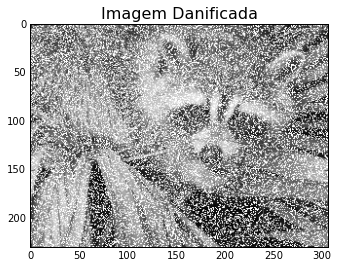

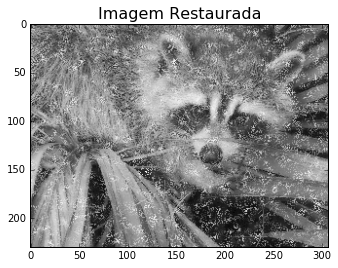

In [23]:
import scipy
from scipy import misc, ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import numpy as np
import numpy.random
from scipy.interpolate import Rbf

np.random.seed(17)

# Carrega e exibe a imagem do guaxinim
face = misc.face(gray=True)
face = ndimage.zoom(face, 0.3)
face = face * .95
                 
plt.imshow(face, cmap=cm.gray)
plt.title("Imagem Original", size=16)
plt.show()

# Danifica demasiadamente a imagem original
ly, lx = face.shape
for y in range(0, ly):
    destroy_x = np.random.choice(lx, int(0.3*lx), replace=False)
    # Danifica as colunas selecionadas na linha `y`
    for x in destroy_x:
        face[y, x] = 255

plt.imshow(face, cmap=cm.gray)
plt.title("Imagem Danificada", size=16)
plt.show()

# Utiliza interpolação RBF para recuperar a imagem
# Como o processo de interpolação é custoso dado o tamanho da imagem,
# utiliza-se apenas uma amostra de 1/4 dos pontos
X, Y = np.where(face < 230)
X = np.random.choice(X, int(0.2*np.shape(X)[0]))
Y = np.random.choice(Y, int(0.2*np.shape(Y)[0]))
Z = face[X,Y]

# Define-se o atributo `smooth` pois há muito pontos, então a interpolação demora demais
rbf = Rbf(X, Y, Z, smooth=0.5)
XI, YI = np.where(face == 255)
ZI = rbf(XI, YI)
rec_face = np.copy(face)
rec_face[XI, YI] = ZI

plt.imshow(rec_face, cmap=cm.gray)
plt.title("Imagem Restaurada", size=16)
plt.show()

## Referências

[1] Thirumuruganathan, Saravanan. A Detailed Introduction to K-Nearest Neighbor (KNN) Algorithm. May 17, 2010. https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/

[2] Ming Leung. K. k-Nearest Neighbor Algorithm for Classification. November 13, 2007. http://cis.poly.edu/~mleung/FRE7851/f07/k-NearestNeighbor.pdf

[3] Nearest Neighbors (Tutorial). http://scikit-learn.org/stable/modules/neighbors.html#k-d-tree

[4] K-nearest neighbors algorithm. (2016, June 15). In Wikipedia, The Free Encyclopedia. Retrieved 22:16, June 17, 2016, from https://en.wikipedia.org/w/index.php?title=K-nearest_neighbors_algorithm&oldid=725456084

[5] Nearest Neighbors Classification: an example of classification using nearest neighbors. http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py

[6] Nearest Neighbors regression: an example of regression using nearest neighbors. http://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#example-neighbors-plot-regression-py

[7] Face completion with a multi-output estimators: an example of multi-output regression using nearest neighbors. http://scikit-learn.org/stable/auto_examples/plot_multioutput_face_completion.html#example-plot-multioutput-face-completion-py

[8] Gael Varoquaux. Recognizing hand-written digits. http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

[9] Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

[10] G. B. Wright. Radial Basis Function Interpolation: Numerical and Analytical Developments. University of Colorado, Boulder. PhD Thesis, 2003.

[11] Radial basis function. (2016, May 17). In Wikipedia, The Free Encyclopedia. Retrieved 22:15, June 17, 2016, from https://en.wikipedia.org/w/index.php?title=Radial_basis_function&oldid=720644276

[12] Radial basis function network. (2016, June 5). In Wikipedia, The Free Encyclopedia. Retrieved 23:14, June 17, 2016, from https://en.wikipedia.org/w/index.php?title=Radial_basis_function_network&oldid=723826906

[13] Using radial basis functions for smoothing/interpolation. http://scipy-cookbook.readthedocs.io/items/RadialBasisFunctions.html